In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')

In [3]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

In [5]:
numerical_features = train.select_dtypes(include = np.number)
categorical_features = train.select_dtypes(include = np.object)
print("Numerical Features, Shape :", numerical_features.columns, numerical_features.shape)
print('\n')
print("Cateogrical Features, Shape :", categorical_features.columns, categorical_features.shape)

Numerical Features, Shape : Index(['loan_id', 'interest_rate', 'unpaid_principal_bal', 'loan_term',
       'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio',
       'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13'],
      dtype='object') (116058, 24)


Cateogrical Features, Shape : Index(['source', 'financial_institution', 'origination_date',
       'first_payment_date', 'loan_purpose'],
      dtype='object') (116058, 5)


In [9]:
numerical_features.drop('loan_id', axis = 1).iloc[:,:10].describe()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type
count,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003257
std,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.056977
min,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000
50%,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000
75%,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000
max,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000


In [10]:
print(pd.DataFrame({'Skewness' : train.skew(), 'Kurtosis' : train.kurt()}))

                           Skewness     Kurtosis
loan_id                    0.004114    -1.197545
interest_rate              0.051326     0.169871
unpaid_principal_bal       0.897524     0.556988
loan_term                 -0.692948    -1.293404
loan_to_value             -0.765251     0.078106
number_of_borrowers       -0.379397    -1.856090
debt_to_income_ratio      -0.194303    -0.825119
borrower_credit_score     -3.570945    48.502768
insurance_percent          2.743691     5.871008
co-borrower_credit_score  -0.362473    -1.849904
insurance_type            17.436825   302.048078
m1                        23.399482   665.694722
m2                        32.194304  1423.668497
m3                        41.842040  2486.186250
m4                        45.131291  2909.174552
m5                        38.012865  2070.664019
m6                        41.184750  2310.310053
m7                        41.899434  2381.312092
m8                        40.627494  2238.810673
m9                  

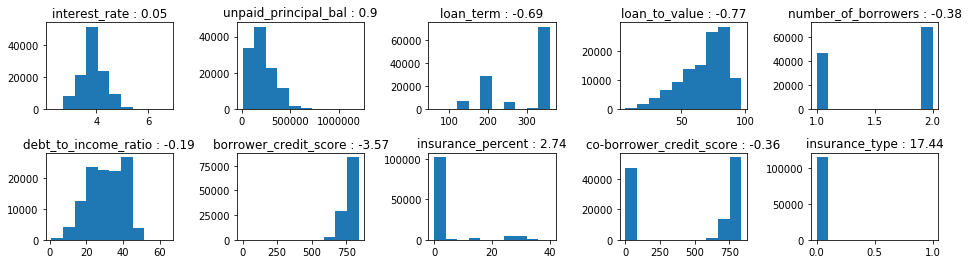

In [31]:
fig, axes = plt.subplots(2,5 , figsize = (16,4))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
axes = axes.ravel()
for i,j in zip([i for i in numerical_features.columns.to_list()[1:]], range(10)):
    axes[j].hist(numerical_features[i])
    axes[j].set_title(i+' : '+str(np.round(numerical_features[i].skew(),2)))  

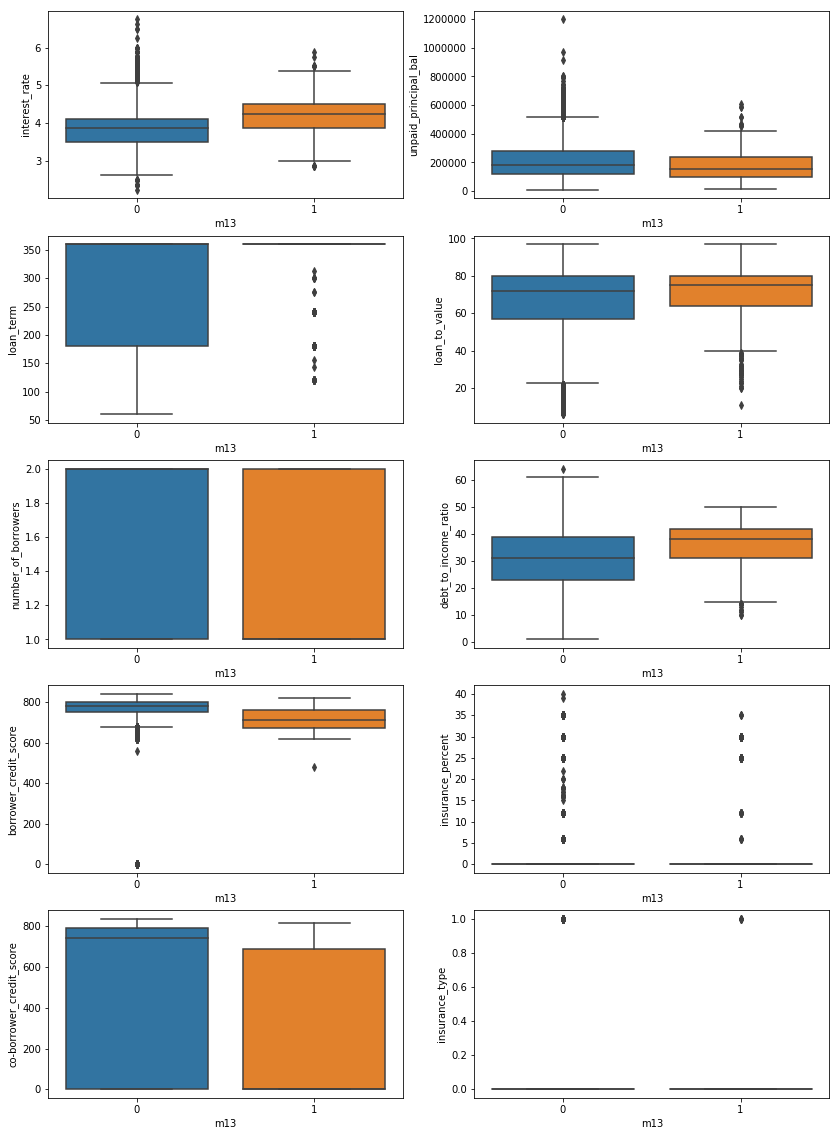

In [47]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(14,20))
AX = ax.ravel()

for i,j in zip([i for i in numerical_features.columns.to_list()[1:]],AX):
    sns.boxplot(x = 'm13', y = i, data =numerical_features,ax=j)

In [52]:
cols = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']
for i in cols:
    print(pd.crosstab(numerical_features[i], numerical_features['m13']))

m13       0    1
m1              
0    115140  589
1       250   43
2        27    3
3         5    1
m13       0    1
m2              
0    115261  583
1       153   43
2         5    8
3         2    1
4         1    1
m13       0    1
m3              
0    115287  581
1       125   42
2         6    8
3         1    3
4         2    1
5         1    1
m13       0    1
m4              
0    115307  553
1       104   64
2         6   10
3         3    5
4         1    2
5         0    1
6         1    1
m13       0    1
m5              
0    115234  518
1       169   80
2        10   23
3         5    7
4         2    4
5         1    2
6         0    1
7         1    1
m13       0    1
m6              
0    115265  520
1       145   69
2         5   21
3         4   12
4         3    6
5         0    4
6         0    2
7         0    1
8         0    1
m13       0    1
m7              
0    115236  492
1       170   96
2        11   17
3         1   12
4         2    6
5         2   

In [53]:
train[cols].max()

m1      3
m2      4
m3      5
m4      6
m5      7
m6      8
m7      9
m8     10
m9     11
m10    12
m11    13
m12    14
dtype: int64

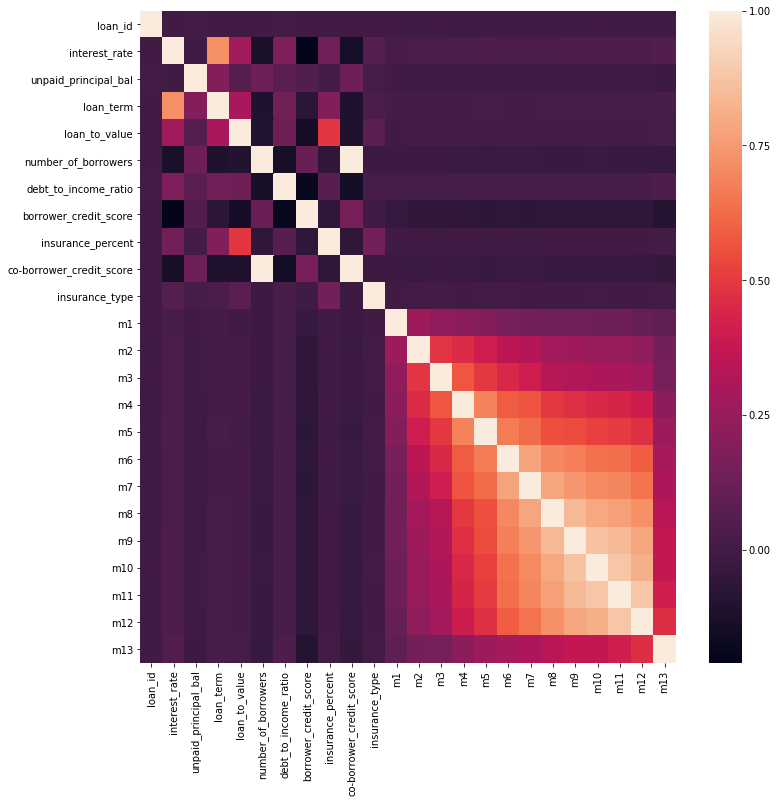

In [54]:
plt.figure(figsize = (12, 12))
sns.heatmap(numerical_features.corr())

In [58]:
for i in categorical_features.columns.to_list():
    print(i + ":" + str(categorical_features[i].nunique()))
    print(categorical_features[i].value_counts())
    print('\n')

source:3
X    63858
Y    37554
Z    14646
Name: source, dtype: int64


financial_institution:19
OTHER                          49699
Browning-Hart                  31852
Swanson, Newton and Miller      6874
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
Turner, Baldwin and Rhodes      1846
Suarez Inc                      1790
Cole, Brooks and Vincent        1642
Richards-Walters                1459
Taylor, Hunt and Rodriguez      1259
Sanchez-Robinson                1193
Sanchez, Hays and Wilkerson      853
Romero, Woods and Johnson        750
Thornton-Davis                   651
Anderson-Taylor                  483
Richardson Ltd                   473
Chapman-Mcmahon                  388
Name: financial_institution, dtype: int64


origination_date:3
2012-02-01    52334
2012-01-01    49093
2012-03-01    14631
Name: origination_date, dtype: int64


first_payment_date:4
04/2012    52840
0

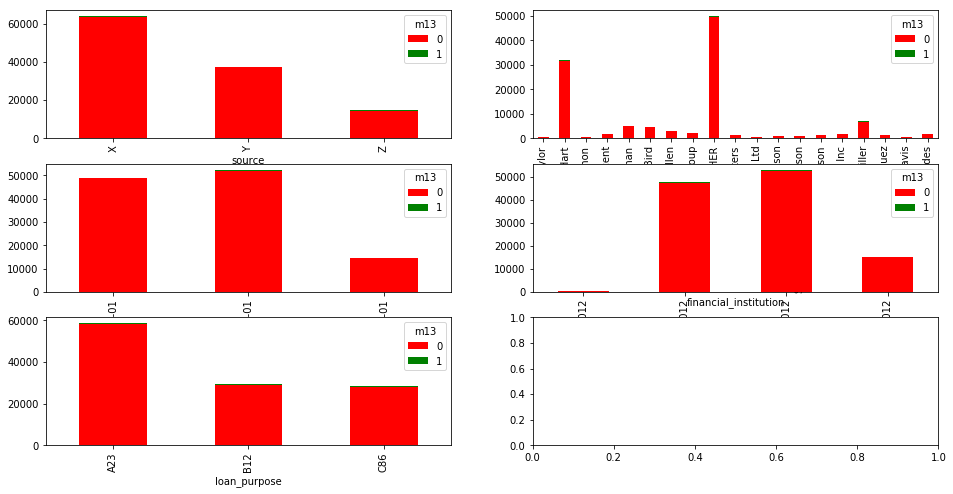

In [60]:
fig, axes = plt.subplots(3,2, figsize = (16,8))
axes = axes.ravel()

for i,j in zip([i for i in categorical_features.columns.to_list()], axes):
    temp = pd.crosstab(train[i], train['m13'])
    temp.plot(kind = 'bar', stacked = True, color = ['red', 'green'] , grid = False, ax = j)

In [62]:
for i in categorical_features.columns.to_list():
    print(pd.crosstab(train[i], train['m13']))
    print('\n')

m13         0    1
source            
X       63553  305
Y       37307  247
Z       14562   84


m13                              0    1
financial_institution                  
Anderson-Taylor                480    3
Browning-Hart                31677  175
Chapman-Mcmahon                388    0
Cole, Brooks and Vincent      1630   12
Edwards-Hoffman               4816   41
Martinez, Duffy and Bird      4692   23
Miller, Mcclure and Allen     3139   19
Nicholson Group               2105   11
OTHER                        49430  269
Richards-Walters              1454    5
Richardson Ltd                 472    1
Romero, Woods and Johnson      748    2
Sanchez, Hays and Wilkerson    851    2
Sanchez-Robinson              1192    1
Suarez Inc                    1785    5
Swanson, Newton and Miller    6828   46
Taylor, Hunt and Rodriguez    1255    4
Thornton-Davis                 648    3
Turner, Baldwin and Rhodes    1832   14


m13                   0    1
origination_date            
201